
# -------------- Auxiliar 7 --------------

## AS4501-1 

<font size='3'> Profs. Valentino Gonzalez, Francisco Förster

<font size='3'> Author: P. Cáceres Burgos

# ------------------------------------------


# Let's train a neural network! 

In [1]:
# We must install keras, tensorflow, and visualkeras (optional)

import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import datetime
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import visualkeras


/Users/pola/astroinf_env/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
os.environ['TENSORBOARD_BINARY'] = '/Users/pola/astroinf_env/bin/tensorboard'

In [3]:
rm -rf ./logs/

In [4]:
%load_ext tensorboard

# For this class we will train a Neural Network that can guess the redshift of a source given their magnitudes in u,g,r,i,z and petrosian radii in the r band containing 50% and 90% of the petrosian flux 

In [5]:
with open('../Data_AUXs/DR9_photo-z-small (1).pkl', 'rb') as fp:
    sdss = pickle.load(fp)

len(sdss['z_spec'])

100000

## We will use the data from SDSS DR9. From this data, we have the redshift from spectroscopy (reliable) and from photometry alone (sus). We can compare how well does photometric redshifts follow the spectral estimation:

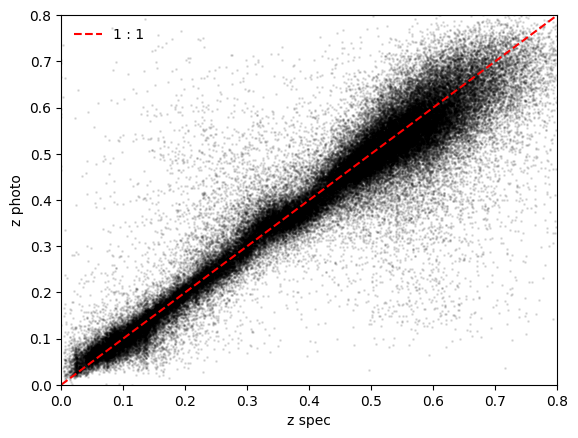

In [6]:
plt.scatter(sdss['z_spec'], sdss['z_photo'], s=1, color='k', alpha=0.1)
plt.plot([sdss['z_spec'].min(), sdss['z_spec'].max()], 
         [sdss['z_spec'].min(), sdss['z_spec'].max()], ls='--', color='r',
        label='1 : 1')
plt.xlabel('z spec')
plt.ylabel('z photo')
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.legend(frameon=False)
plt.show()

## Mmmm that doesn't look so constrained, look at those outliers! they are everywhere :(

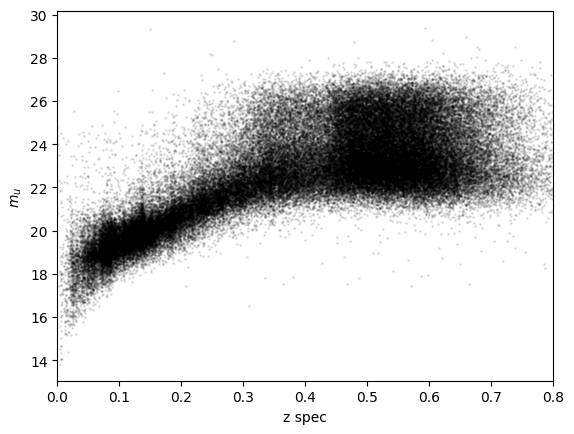

In [7]:
plt.scatter(sdss['z_spec'], sdss['m_u'], s=1, color='k', alpha=0.1)
plt.xlim(0,0.8)

plt.xlabel('z spec')
plt.ylabel('$m_u$')
plt.show()

In [9]:
sdss_df = pd.DataFrame(sdss)

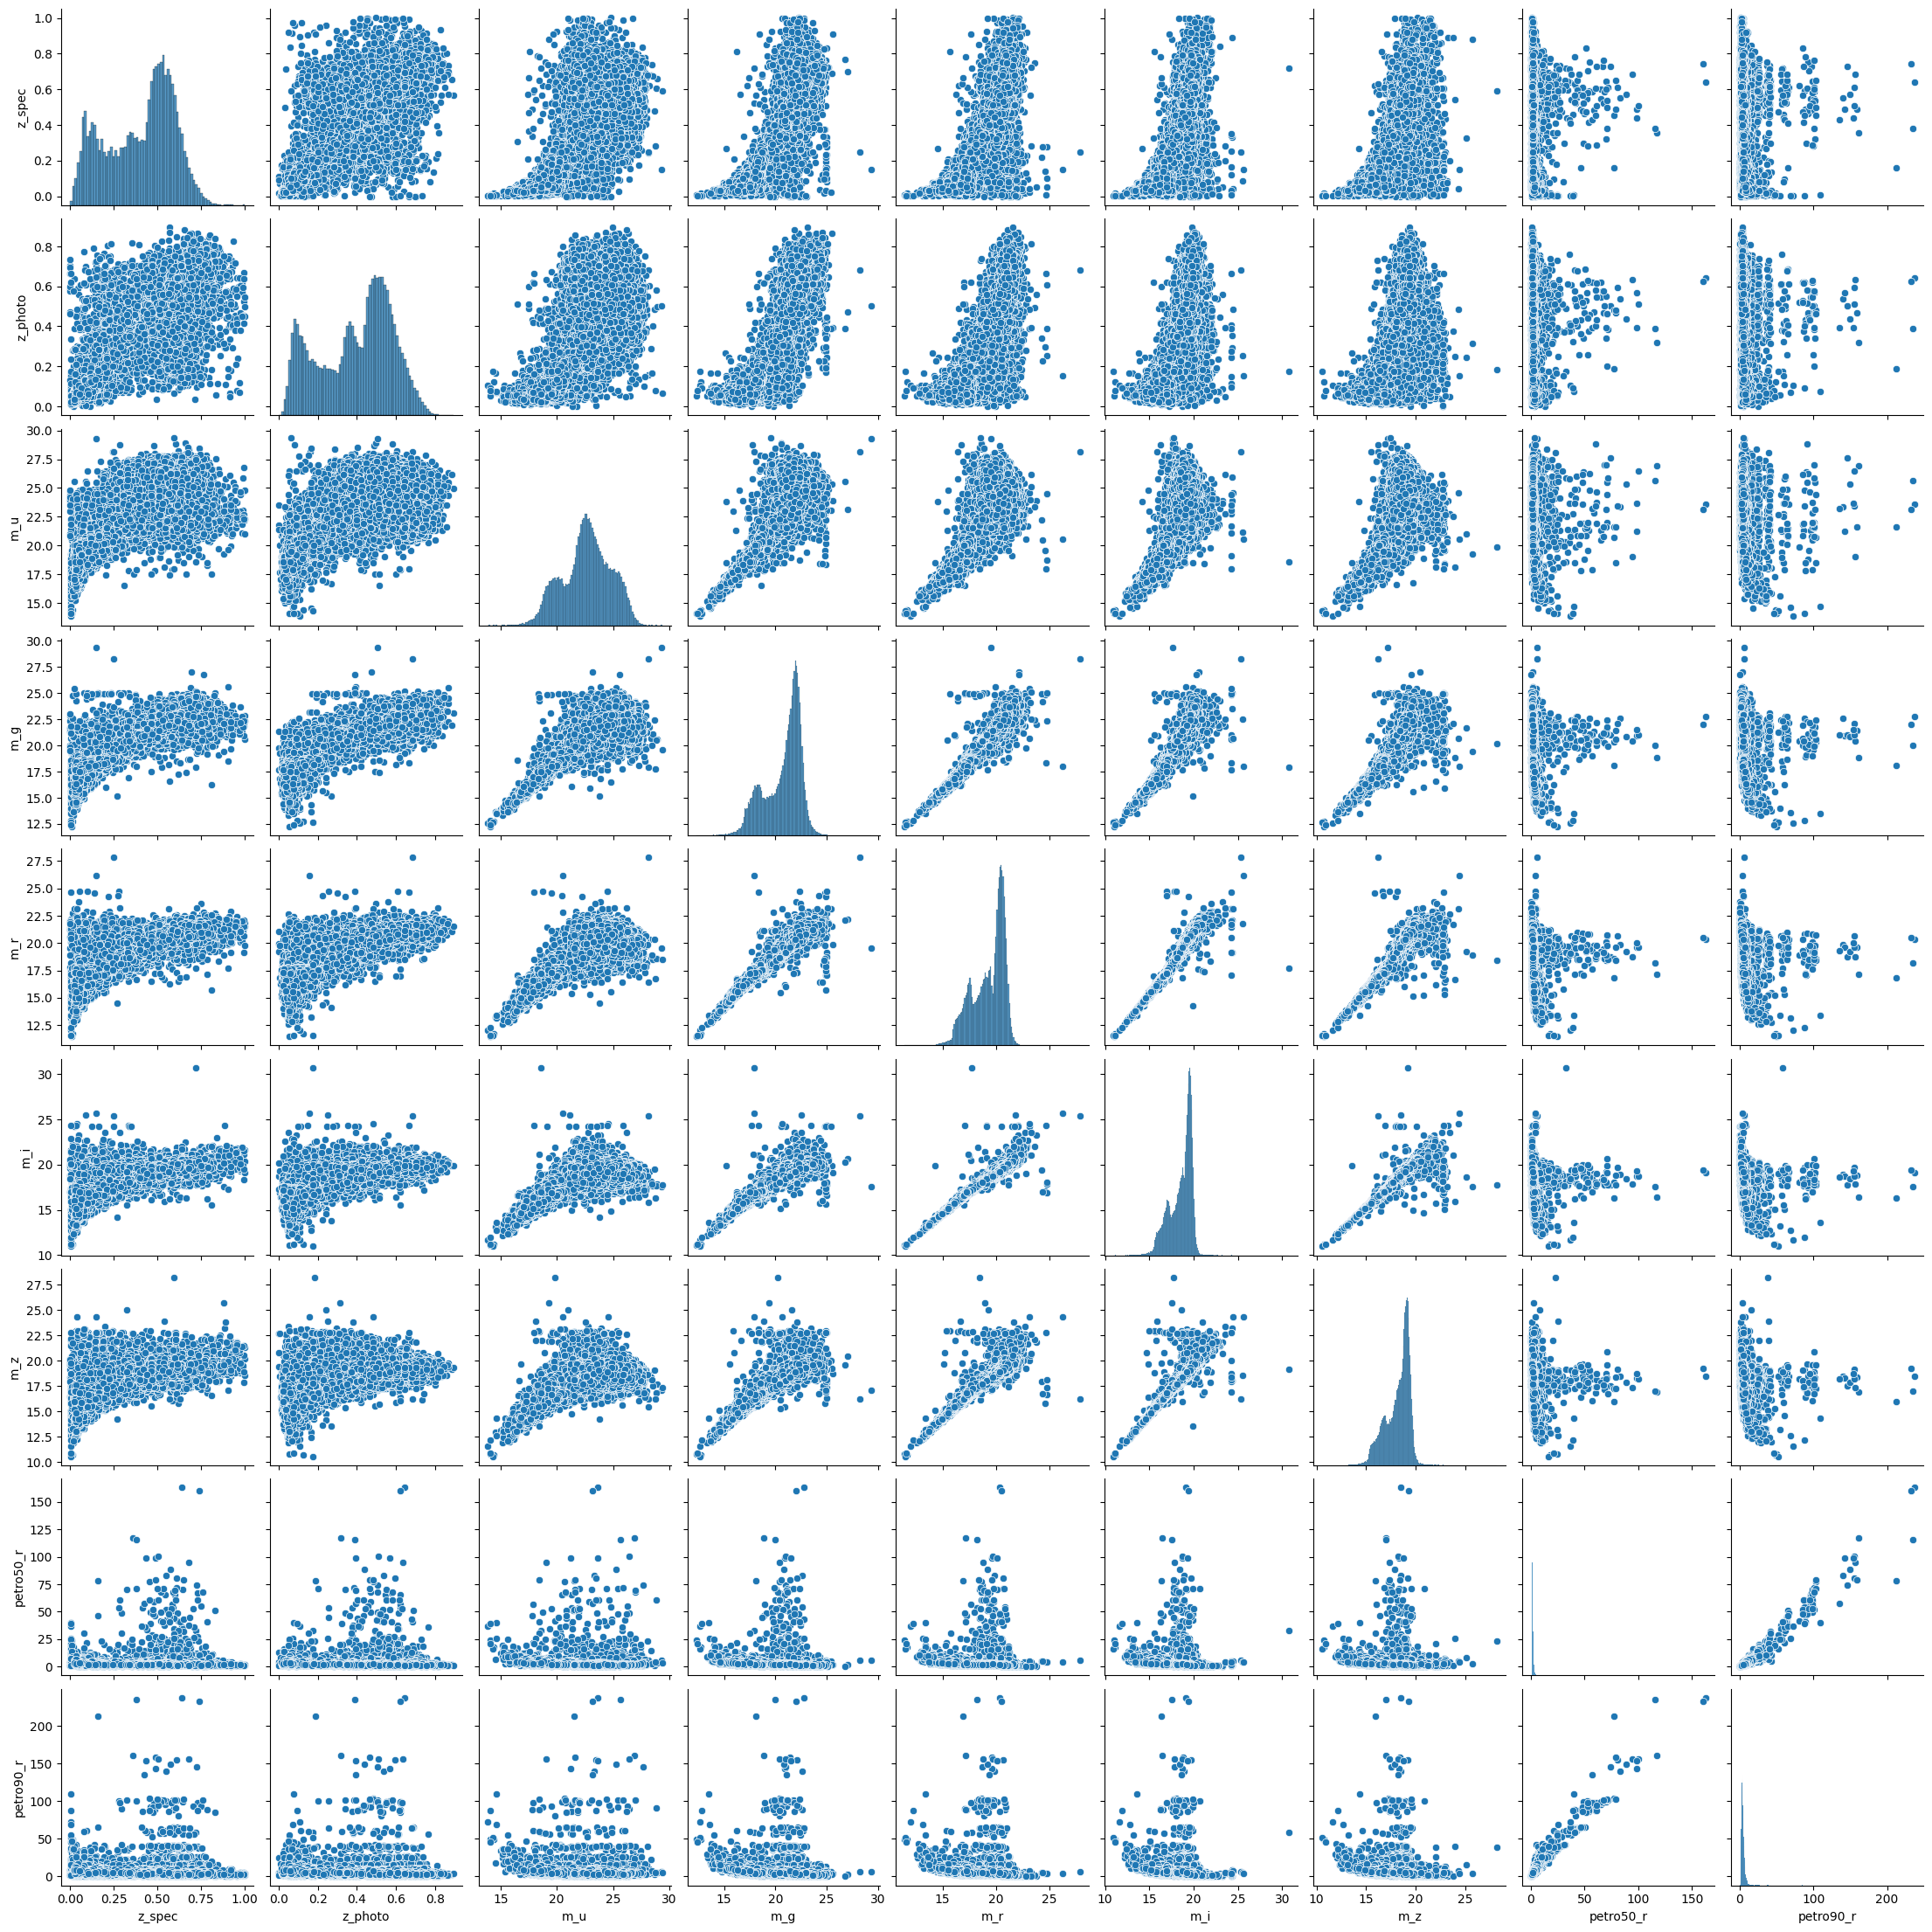

In [115]:
sns.pairplot(sdss_df)

In [8]:
# Here we prepare the data 

X = np.stack( (sdss['m_u'],sdss['m_g'],sdss['m_r'],
               sdss['m_i'],sdss['m_z'],sdss['petro50_r'],
               sdss['petro90_r']),axis=1 )

y = sdss['z_spec'] # The spectroscopic redshifts are our true labels

In [9]:
# Next, we split it in train and test subsets 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=42)

In [60]:
model = Sequential(name='first_try')

model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.summary()

Model: "first_try"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                96        
                                                                 
 dense_25 (Dense)            (None, 24)                312       
                                                                 
 dense_26 (Dense)            (None, 1)                 25        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model = Sequential()

model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                96        
                                                                 
 dense_11 (Dense)            (None, 24)                312       
                                                                 
 dense_12 (Dense)            (None, 1)                 25        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/Users/pola/astroinf_env/lib/python3.8/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


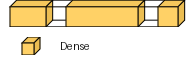

<Figure size 800x800 with 0 Axes>

In [11]:
plt.figure(figsize=(8,8))
visualkeras.layered_view(model, legend=True, scale_xy=3, spacing=20, scale_z=3, max_z=1000)

In [61]:
history = model.fit(X_train, Y_train, epochs=20, 
                    batch_size=32, validation_split=0.2,
                   callbacks=[tensorboard_callback])

Epoch 1/20
2250/2250 [==============================] - 4s 1ms/step - loss: 0.0194 - mae: 0.0932 - val_loss: 0.0120 - val_mae: 0.0770
Epoch 2/20
2250/2250 [==============================] - 1s 620us/step - loss: 0.0087 - mae: 0.0681 - val_loss: 0.0078 - val_mae: 0.0602
Epoch 3/20
2250/2250 [==============================] - 1s 526us/step - loss: 0.0074 - mae: 0.0619 - val_loss: 0.0064 - val_mae: 0.0546
Epoch 4/20
2250/2250 [==============================] - 1s 553us/step - loss: 0.0066 - mae: 0.0579 - val_loss: 0.0059 - val_mae: 0.0528
Epoch 5/20
2250/2250 [==============================] - 1s 634us/step - loss: 0.0062 - mae: 0.0554 - val_loss: 0.0056 - val_mae: 0.0514
Epoch 6/20
2250/2250 [==============================] - 1s 552us/step - loss: 0.0059 - mae: 0.0537 - val_loss: 0.0062 - val_mae: 0.0557
Epoch 7/20
2250/2250 [==============================] - 1s 570us/step - loss: 0.0057 - mae: 0.0526 - val_loss: 0.0057 - val_mae: 0.0502
Epoch 8/20
2250/2250 [============================

In [62]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 54588), started 1:20:05 ago. (Use '!kill 54588' to kill it.)

In [36]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 262us/step


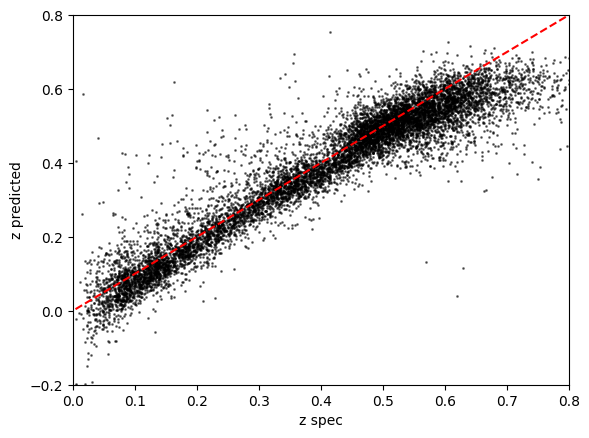

In [37]:
plt.scatter(Y_test, Y_pred, s=1, color='k', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='r', ls='--')
plt.xlabel('z spec')
plt.ylabel('z predicted')
plt.xlim(0,0.8)
plt.ylim(-0.2,0.8)
plt.show()

In [66]:
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for i, w in enumerate(weights):
        print(f"  Weight {i} shape: {w.shape}")

Layer: dense_24
  Weight 0 shape: (7, 12)
  Weight 1 shape: (12,)
Layer: dense_25
  Weight 0 shape: (12, 24)
  Weight 1 shape: (24,)
Layer: dense_26
  Weight 0 shape: (24, 1)
  Weight 1 shape: (1,)


In [39]:
# we can save the model and its architecture as:

model.save('Aux7_model.h5')


/Users/pola/astroinf_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
from tensorflow.keras.models import load_model

saved_model = load_model('Aux7_model.h5')

In [64]:
saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                96        
                                                                 
 dense_17 (Dense)            (None, 24)                312       
                                                                 
 dense_18 (Dense)            (None, 1)                 25        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
predictions = saved_model.predict(X_test)  # assuming you have test data


313/313 [==============================] - 0s 265us/step


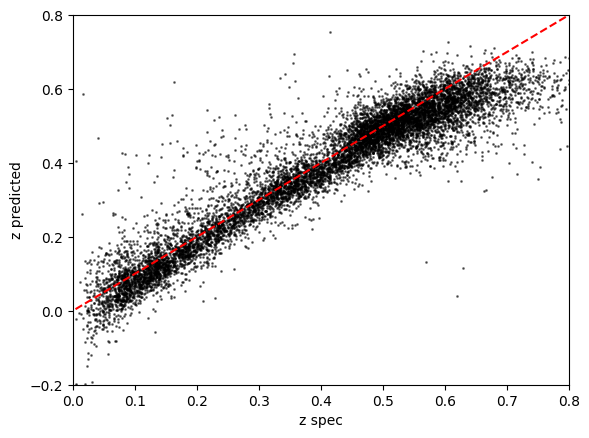

In [46]:
plt.scatter(Y_test, predictions, s=1, color='k', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='r', ls='--')
plt.xlabel('z spec')
plt.ylabel('z predicted')
plt.xlim(0,0.8)
plt.ylim(-0.2,0.8)
plt.show()